In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
df = pd.read_csv("final_annotations.csv")

In [58]:
df.head()

,sentence,sentiment,impact,sentiments,impacts,batch,film_title
0,Good restraint on the use of adjectives.,Positive,Engagement with Film,['Positive' 'Positive' 'Positive'],['Engagement with Film' 'Not yet categorized' ...,1,Seeing the Beginning of Time
1,Enjoy seeing/tracking storms....fascinating...,Positive,Interest with Science Topic,['Positive' 'Positive' 'Positive'],['Interest with Science Topic' 'Interest with ...,1,SuperTornado: Anatomy of a Megadisaster
2,"The sound design, visuals and narration are bl...",Positive,Engagement with Film,['Positive' 'Positive' 'Positive'],['Engagement with Film' 'Engagement with Film'...,1,Seeing the Beginning of Time
3,Richard Dormer had a calming voice that made t...,Positive,Engagement with Film,['Positive' 'Positive' 'Positive'],['Engagement with Film' 'Engagement with Film'...,1,Birth of Planet Earth
4,So many never seen before images and actual pi...,Positive,Engagement with Film,['Positive' 'Positive' 'Neutral'],['Shift in Knowledge' 'Engagement with Film' '...,1,The Jupiter Enigma


In [59]:
df.drop(["sentiments", "impacts", "film_title", "batch"], axis = 1, inplace = True)

In [60]:
df.head()

,sentence,sentiment,impact
0,Good restraint on the use of adjectives.,Positive,Engagement with Film
1,Enjoy seeing/tracking storms....fascinating...,Positive,Interest with Science Topic
2,"The sound design, visuals and narration are bl...",Positive,Engagement with Film
3,Richard Dormer had a calming voice that made t...,Positive,Engagement with Film
4,So many never seen before images and actual pi...,Positive,Engagement with Film


### what needs to be done?

1. balanced weights for the class.
2. undersampling of majority class, oversampling of minority class.
3. using stratified sampling for train test split.
4. k-folds cross validation.
5. returning a table of accuracy, precision recall and f1 score.

In [61]:
## dropping duplicates
df.drop_duplicates(inplace = True)
df.shape

(1265, 3)

<AxesSubplot: >

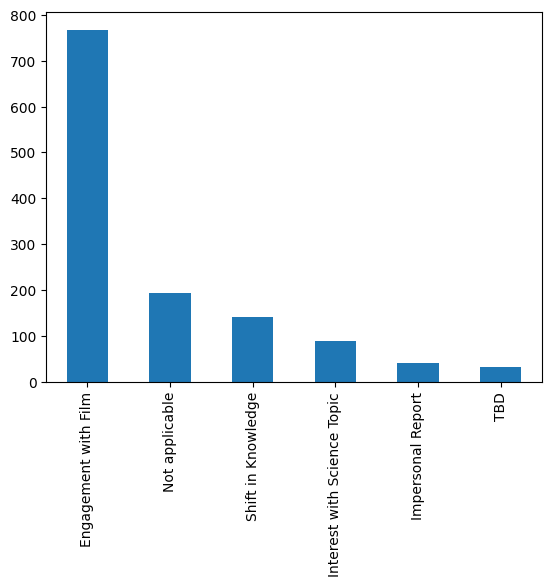

In [62]:
x = df["impact"].value_counts()
x.plot(kind = "bar")

In [63]:
## dropping the rows when impact is "TBD"
df = df[df["impact"] != "TBD"]

<AxesSubplot: >

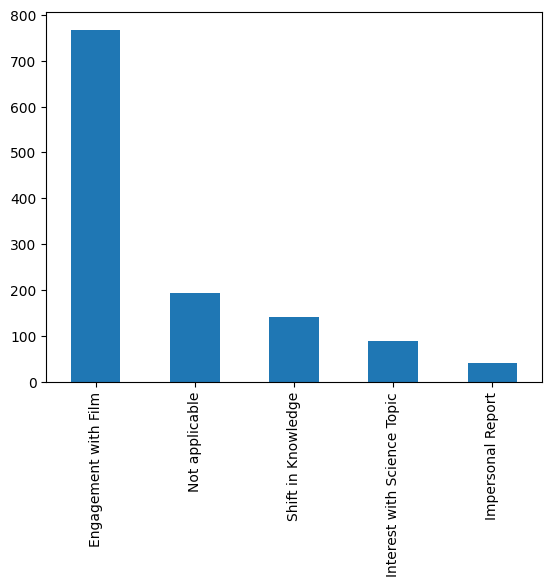

In [64]:
df["impact"].value_counts().plot(kind = "bar")

In [65]:
## changing the impact values to numeric values
## df["impact"] = df["impact"].map({"Engagement with Film": 0, "Not applicable": 1, 
##           "Shift in Knowledge": 2,"Interest with Science Topic": 3, "Impersonal Report": 4})

In [66]:
## df["sentiment"] = df["sentiment"].map({"Positive": 1, "Negative": -1, "Neutral": 0})

<AxesSubplot: >

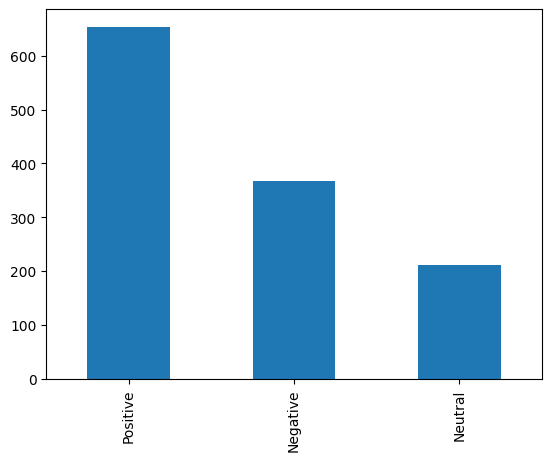

In [67]:
df["sentiment"].value_counts().plot(kind = "bar")

In [68]:
## !python3 -m spacy download en_core_web_lg

In [113]:
df.head()

from sklearn.model_selection import train_test_split

X = df["sentence"]
y = df["impact"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [115]:
import spacy
nlp = spacy.load("en_core_web_lg")

def make_doc(X, y):
    docs = []
    data = zip(X, y)
    for doc, lable in nlp.pipe(data, as_tuples = True):
        if lable == "Engagement with Film":
            doc.cats["Engagement with Film"] = 1
            doc.cats["Not applicable"] = 0
            doc.cats["Shift in Knowledge"] = 0
            doc.cats["Interest with Science Topic"] = 0
            doc.cats["Impersonal Report"] = 0
        elif lable == "Not applicable":
            doc.cats["Engagement with Film"] = 0
            doc.cats["Not applicable"] = 1
            doc.cats["Shift in Knowledge"] = 0
            doc.cats["Interest with Science Topic"] = 0
            doc.cats["Impersonal Report"] = 0
        elif lable == "Shift in Knowledge":
            doc.cats["Engagement with Film"] = 0
            doc.cats["Not applicable"] = 0
            doc.cats["Shift in Knowledge"] = 1
            doc.cats["Interest with Science Topic"] = 0
            doc.cats["Impersonal Report"] = 0
        elif lable == "Interest with Science Topic":
            doc.cats["Engagement with Film"] = 0
            doc.cats["Not applicable"] = 0
            doc.cats["Shift in Knowledge"] = 0
            doc.cats["Interest with Science Topic"] = 1
            doc.cats["Impersonal Report"] = 0
        elif lable == "Impersonal Report":
            doc.cats["Engagement with Film"] = 0
            doc.cats["Not applicable"] = 0
            doc.cats["Shift in Knowledge"] = 0
            doc.cats["Interest with Science Topic"] = 0
            doc.cats["Impersonal Report"] = 1
        docs.append(doc)
    return (docs)

In [117]:
from spacy.tokens import DocBin
num_texts = len(df["sentence"])

train_docs = make_doc(X_train, y_train)
test_docs = make_doc(X_test, y_test)

db = DocBin(docs = train_docs)
db.to_disk("./data/train.spacy")

db = DocBin(docs = test_docs)
db.to_disk("./data/test.spacy")